# DFA and Factor Investing

## HBS Case
### *Dimensional Fund Advisors, 2002 [HBS 9-203-026].

*Pages 1-5 of the case are required. Pages 6-11 get into interesting issues around trading (especially adverse selection) and tax considerations. These sections are useful for building market knowledge, but we will not cover them.**

# 1. READING - DFA's Strategy

#### 1. Investment philosophy.

* In 100 words or less, describe DFA's belief about how to find premium in the market.

* To what degree does their strategy rely on individual equity analysis? Macroeconomic fundamentals? Efficient markets?

* Are DFA's funds active or passive?

* What do DFA and others mean by a "value" stock? And a "growth" stock?

#### 2. Challenges for DFA's view.

* What challenge did DFA's model see in the 1980's?

* And in the 1990's?

#### 3. The market.

* Exhibit 3 has data regarding a universe of 5,020 firms. How many are considered ``large cap"? What percent of the market value do they account for?

* Exhibit 6 shows that the U.S. value factor (HML) has underperformed the broader U.S. equity market in 1926-2001, including every subsample except 1963-1981. So why should an investor be interested in this value factor?

# 2. The Factors

DFA believes certain stocks have higher expected excess returns. In addition to the overall market equity premium, DFA believes that there is a premium attached to a **size** and **value** factor. Note that these three factors are already listed as **excess** returns.

### Data
Use the data found in `data/dfa_analysis_data.xlsx`.

- Monthly **excess** return data for the overall equity market, $\tilde{r}^{\text{mkt}}$. 

- The sheet also contains data on two additional factors, `SMB` and `HML`, as well as the risk-free rate. 

- You do not need any of these columns for the homework. Just use the `MKT` column, which is **excess** market returns. (So no need to subtract the risk-free rate.)

#### Source:

Ken French library, accessible through the pandas-datareader API.

### 1. The Factors

Calculate their univariate performance statistics: 

* mean
* volatility
* Sharpe
* VaR(.05)

Report these for the following three subsamples:

* Beginning - 1980
* 1981 - 2001
* 2002 - End

### 2. 

Based on the factor statistics above, answer the following.

- Does each factor have a premium (positive expected excess return) in each subsample?

- Does the premium to the size factor get smaller after 1980?

- Does the premium to the value factor get smaller during the 1990's?

- How have the factors performed since the time of the case, (2002-present)?

### 3.

The factors are constructed in such a way as to reduce correlation between them.

* Report the correlation matrix across the three factors. 

* Does the construction method succeed in keeping correlations small? 

* Does it achieve this in each subsample?

### 4. 

* Plot the cumulative returns of the three factors. 

* Create plots for the 1981-2001 subsample as well as the 2002-Present subsample.

### 5.

* Does it appear that all three factors were valuable in 1981-2001? 
* And post-2001? 

Would you advise DFA to continue emphasizing all three factors?

In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
#Question 2.1 Answer

#importing excel
path='../data/dfa_analysis_data.xlsx'
sheet='factors'
data_frame=pd.read_excel(path, sheet)
data_frame

#dividing by subsets
base=data_frame.copy()
base['Date']=pd.to_datetime(base['Date'], errors='coerce')
date=base['Date']

m1 = date.dt.year <= 1980
m2 = (date.dt.year >= 1981) & (date.dt.year <= 2001)
m3 = date.dt.year >= 2002

subset_1=data_frame.loc[m1]
subset_2=data_frame.loc[m2]
subset_3=data_frame.loc[m3]

#calculating statistics
def calc_summary_statistics(
        returns: pd.DataFrame,
        annual_factor: int=12,
        var_q=0.05
) -> pd.DataFrame:
    """
    Calculate summary statistics for a time series of returns
    """
    #uploading the database
    returns = returns.copy()
    returns = returns.drop(labels='Date', axis=1)
    summary_statistics = pd.DataFrame(index=returns.columns)

    #calculating basic statistics
    summary_statistics['Mean'] = returns.mean()
    summary_statistics['Annualized Mean'] = returns.mean() * annual_factor
    summary_statistics['Vol'] = returns.std()
    summary_statistics['Annualized Vol'] = returns.std() * np.sqrt(annual_factor)
    summary_statistics['Sharpe'] = returns.mean() / returns.std()
    summary_statistics['Annualized Sharpe'] = summary_statistics['Sharpe'] * np.sqrt(annual_factor)
    summary_statistics[f'Historical VaR ({var_q:.2%})'] = returns.quantile(var_q, axis = 0)
    #summary_statistics[f'Annualized Historical VaR ({var_q:.2%})'] = returns.quantile(var_q, axis = 0) * np.sqrt(annual_factor)

    return summary_statistics

summary_subset_1=calc_summary_statistics(subset_1)
summary_subset_2=calc_summary_statistics(subset_2)
summary_subset_3=calc_summary_statistics(subset_3)

#printing 
print('<= 1980\n', summary_subset_1)
print('\n1981<=  & <=2001\n', summary_subset_2)
print('\n>= 2002\n', summary_subset_3)

<= 1980
             Mean  Annualized Mean       Vol  Annualized Vol    Sharpe  \
Mkt-RF  0.006746         0.080958  0.059175        0.204988  0.114009   
SMB     0.002826         0.033914  0.032989        0.114277  0.085670   
HML     0.004193         0.050321  0.038748        0.134228  0.108222   
RF      0.002311         0.027730  0.002215        0.007673  1.043281   

        Annualized Sharpe  Historical VaR (5.00%)  
Mkt-RF           0.394938               -0.084090  
SMB              0.296769               -0.041875  
HML              0.374893               -0.044245  
RF               3.614032                0.000000  

1981<=  & <=2001
             Mean  Annualized Mean       Vol  Annualized Vol    Sharpe  \
Mkt-RF  0.006488         0.077852  0.045375        0.157183  0.142980   
SMB    -0.000168        -0.002014  0.033850        0.117260 -0.004959   
HML     0.005380         0.064557  0.031715        0.109863  0.169629   
RF      0.005257         0.063081  0.002238        0.0

In [3]:
#Utsav question 2.1

import pandas as pd
import numpy as np


path = '../data/dfa_analysis_data.xlsx'
sheet = 'factors'
df = pd.read_excel(path, sheet_name=sheet)
df['Date'] = pd.to_datetime(df['Date'])

col_map = {c: 'MKT' for c in df.columns if c.strip().lower() in ['mkt', 'mkt-rf', 'mkt_rf', 'market', 'mkt–rf', 'mkt‐rf']}
if not col_map:
    raise KeyError("Couldn't find a market excess return column (e.g., 'Mkt-RF' or 'MKT').")
df = df.rename(columns=col_map)


m1 = df['Date'].dt.year <= 1980
m2 = (df['Date'].dt.year >= 1981) & (df['Date'].dt.year <= 2001)
m3 = df['Date'].dt.year >= 2002

sub1 = df.loc[m1, ['Date','MKT']]
sub2 = df.loc[m2, ['Date','MKT']]
sub3 = df.loc[m3, ['Date','MKT']]

for name, data in {'<=1980': sub1, '1981-2001': sub2, '>=2002': sub3}.items():
    r = pd.to_numeric(data['MKT'], errors='coerce').dropna()

    mean_m = r.mean()
    vol_m  = r.std(ddof=1)            
    sharpe = mean_m / vol_m
    var_5  = r.quantile(0.05)         

    print(f'\n{name}')
    print(f'Mean:    {mean_m:.4f}')
    print(f'Vol:     {vol_m:.4f}')
    print(f'Sharpe:  {sharpe:.4f}')
    print(f'VaR(5%): {var_5:.4f}')


<=1980
Mean:    0.0067
Vol:     0.0592
Sharpe:  0.1140
VaR(5%): -0.0841

1981-2001
Mean:    0.0065
Vol:     0.0454
Sharpe:  0.1430
VaR(5%): -0.0641

>=2002
Mean:    0.0076
Vol:     0.0443
Sharpe:  0.1717
VaR(5%): -0.0773


#Question 2.2 Answer

-Not every factor shows a positive premium in every subsample. The market factor  is positive throughout. Meanwhile, size is positive before 1980, turns slightly negative from 1981–2001, and is only marginally positive after 2002. Finally, value is positive before 1980 and in 1981–2001, but flat since 2002. So only the market has a consistently positive premium across all three periods.

-It clearly gets smaller. SMB falls from about +0.28% per month pre-1980 to roughly −0.02% per month in 1981–2001, then recovers only to a very small +0.07% per month from 2002 onward. The magnitude never returns to its pre-1980 level, indicating a substantial attenuation of the size effect post-1980.

-It does not get smaller in that middle period; in fact, it’s larger than before 1980. HML rises from about +0.42% per month pre-1980 to roughly +0.54% per month in 1981–2001. The meaningful decline in value shows up only after 2002, not during the 1990s.

-The market factor has delivered a solid premium with its best Sharpe of the three periods. By contrast, SMB is near zero with weak risk-adjusted performance, and HML is essentially flat with negligible Sharpe. In short, the post-2002 era favors the broad market while traditional size and value premia have been very muted.

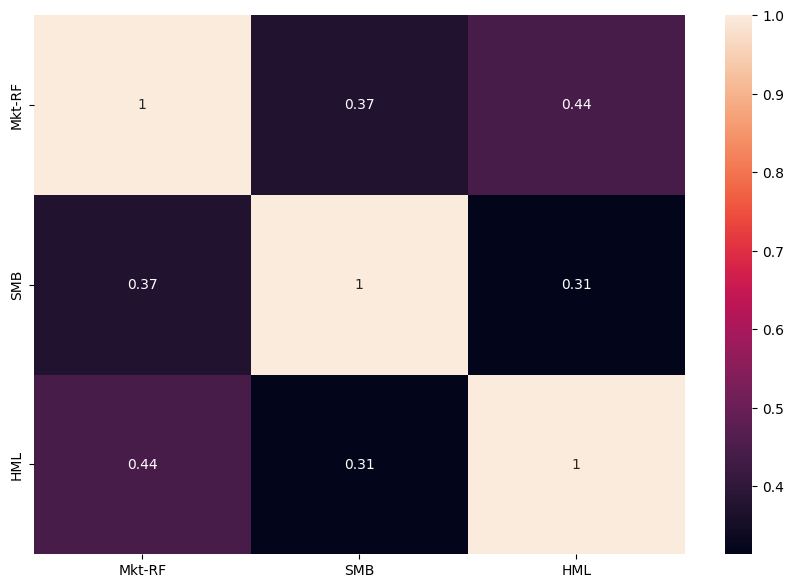

In [16]:
#Question 2.3 Answer
base_correlations=data_frame.copy()
base_correlations=base_correlations.drop(labels=['Date', 'RF'], axis=1)
base_correlations

m1 = date.dt.year <= 1980
m2 = (date.dt.year >= 1981) & (date.dt.year <= 2001)
m3 = date.dt.year >= 2002

subset_1=base_correlations.loc[m1]
subset_2=base_correlations.loc[m2]
subset_3=base_correlations.loc[m3]

correlation_matrix1 = subset_1.corr()
correlation_matrix2 = subset_2.corr()
correlation_matrix3 = subset_3.corr()

matrix_size=7
fig, ax = plt.subplots(figsize=(matrix_size * 1.5, matrix_size))

heatmap1 = sns.heatmap(
    correlation_matrix1, 
    xticklabels=correlation_matrix1.columns,
    yticklabels=correlation_matrix1.columns,
    annot=True,
    )



    


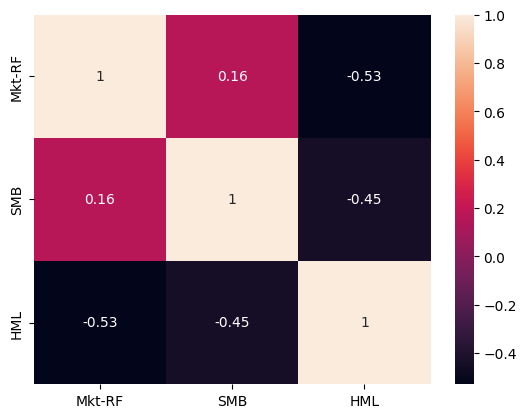

In [14]:
heatmap2 = sns.heatmap(
    correlation_matrix2, 
    xticklabels=correlation_matrix1.columns,
    yticklabels=correlation_matrix1.columns,
    annot=True,
    )

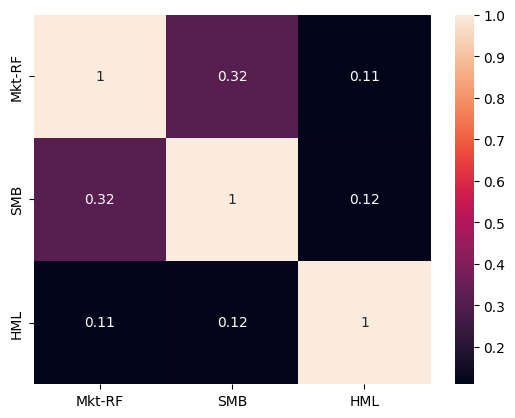

In [15]:
heatmap3 = sns.heatmap(
    correlation_matrix3, 
    xticklabels=correlation_matrix1.columns,
    yticklabels=correlation_matrix1.columns,
    annot=True,
    )

Question 2.3

Not fully successful. 
The construction method reduces correlations in some subsamples, 
but the subsample 1981 - 2001 shows a large correlation (|ρ| ≈ 0.53). 
So it does not keep correlations small in every subsample.

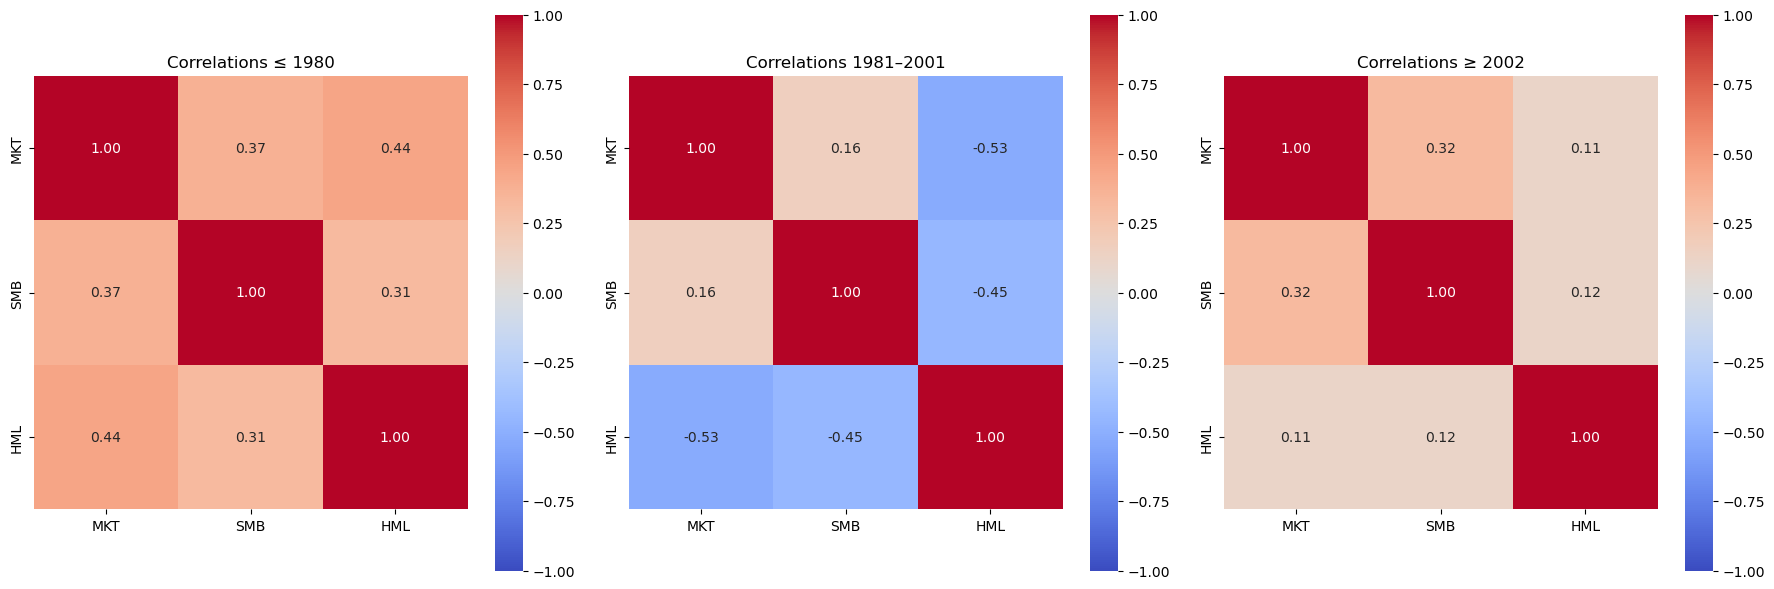


≤ 1980
        MKT    SMB    HML
MKT  1.000  0.374  0.442
SMB  0.374  1.000  0.313
HML  0.442  0.313  1.000

1981–2001
        MKT    SMB    HML
MKT  1.000  0.159 -0.530
SMB  0.159  1.000 -0.445
HML -0.530 -0.445  1.000

≥ 2002
        MKT    SMB    HML
MKT  1.000  0.316  0.110
SMB  0.316  1.000  0.116
HML  0.110  0.116  1.000


In [6]:
# Question 2.3 Utsav

factors = ['MKT', 'SMB', 'HML']

F = df[factors].apply(pd.to_numeric, errors='coerce')

sub1 = F.loc[m1].dropna(how='any')
sub2 = F.loc[m2].dropna(how='any')
sub3 = F.loc[m3].dropna(how='any')

# 2) Correlation matrices
corr1 = sub1.corr()
corr2 = sub2.corr()
corr3 = sub3.corr()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
cmap = "coolwarm"; vmin, vmax = -1, 1

sns.heatmap(corr1, ax=axes[0], annot=True, fmt=".2f", cmap=cmap, vmin=vmin, vmax=vmax, square=True)
axes[0].set_title("Correlations ≤ 1980")

sns.heatmap(corr2, ax=axes[1], annot=True, fmt=".2f", cmap=cmap, vmin=vmin, vmax=vmax, square=True)
axes[1].set_title("Correlations 1981–2001")

sns.heatmap(corr3, ax=axes[2], annot=True, fmt=".2f", cmap=cmap, vmin=vmin, vmax=vmax, square=True)
axes[2].set_title("Correlations ≥ 2002")

plt.tight_layout()
plt.show()

print("\n≤ 1980\n", corr1.round(3))
print("\n1981–2001\n", corr2.round(3))
print("\n≥ 2002\n", corr3.round(3))


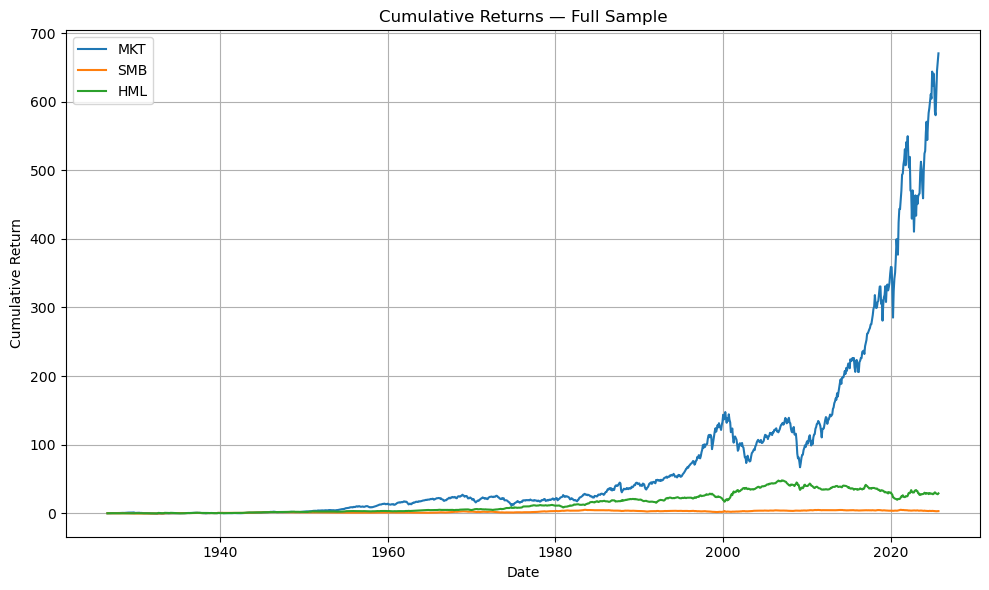

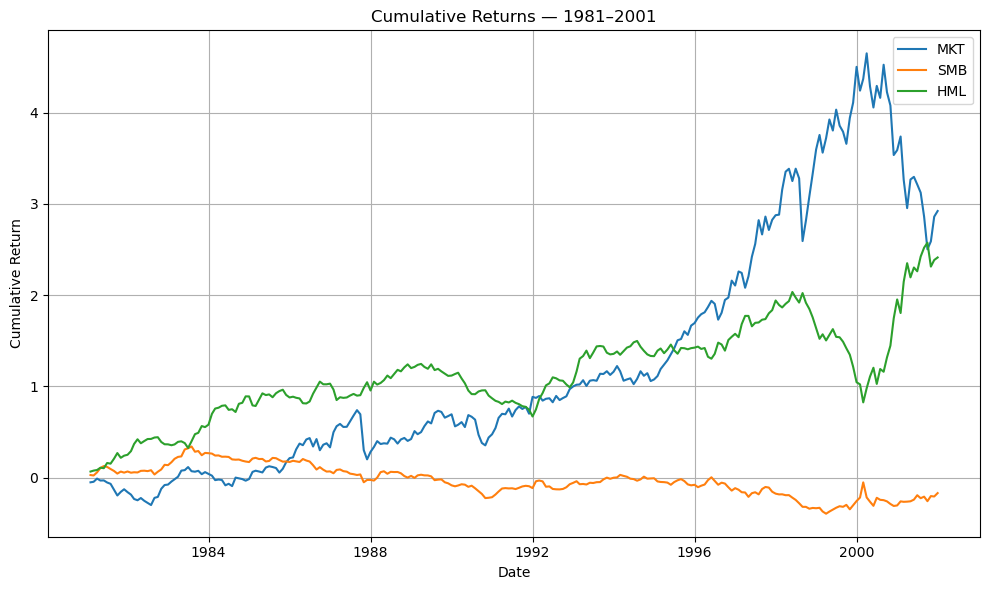

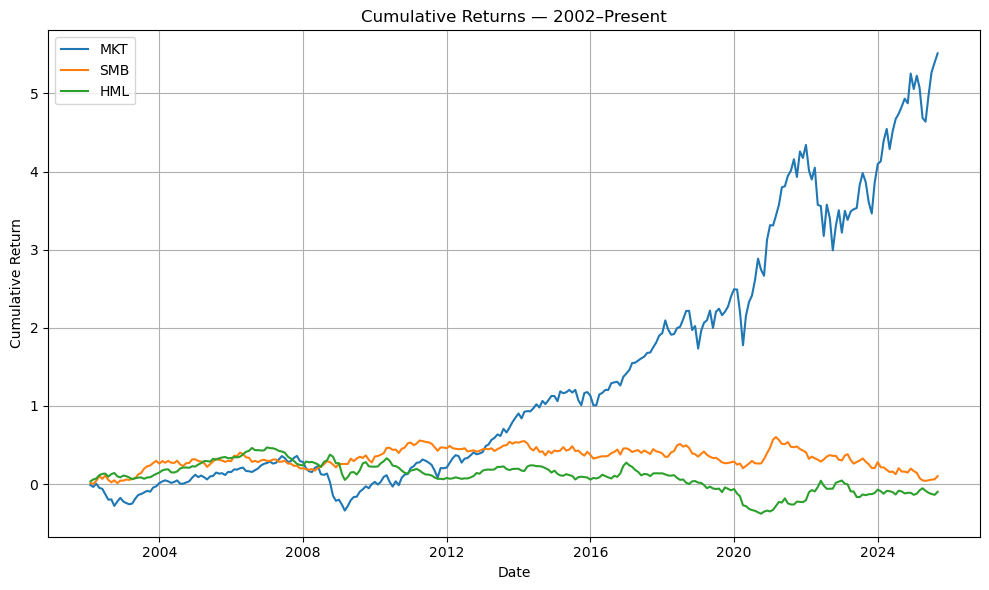

In [9]:

df = df.rename(columns={c: 'MKT' for c in df.columns
                        if c.strip().lower() in ['mkt','mkt-rf','mkt_rf','market','mkt–rf','mkt‐rf']})

F_full   = F
F_81_01  = F.loc[m2]
F_02_now = F.loc[m3]

Cum_full   = (1 + F_full).cumprod() - 1
Cum_81_01  = (1 + F_81_01).cumprod() - 1
Cum_02_now = (1 + F_02_now).cumprod() - 1

plt.figure(figsize=(10,6))
for col in ['MKT','SMB','HML']:
    plt.plot(Cum_full.index, Cum_full[col], label=col)
plt.title('Cumulative Returns — Full Sample'); plt.xlabel('Date'); plt.ylabel('Cumulative Return')
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(10,6))
for col in ['MKT','SMB','HML']:
    plt.plot(Cum_81_01.index, Cum_81_01[col], label=col)
plt.title('Cumulative Returns — 1981–2001'); plt.xlabel('Date'); plt.ylabel('Cumulative Return')
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(10,6))
for col in ['MKT','SMB','HML']:
    plt.plot(Cum_02_now.index, Cum_02_now[col], label=col)
plt.title('Cumulative Returns — 2002–Present'); plt.xlabel('Date'); plt.ylabel('Cumulative Return')
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

In [10]:
F_81_01  = F.loc[m2]
F_02_now = F.loc[m3]

annual = 12

# 1981–2001
mean_81   = F_81_01.mean() * annual
vol_81    = F_81_01.std(ddof=1) * np.sqrt(annual)
sharpe_81 = mean_81 / vol_81
cum_81    = (1 + F_81_01).prod() - 1

score_81 = (pd.concat([mean_81, vol_81, sharpe_81, cum_81], axis=1)
              .set_axis(['Ann. Mean','Ann. Vol','Ann. Sharpe','Total CumRet'], axis=1)
              .round(4))

# 2002–Present
mean_02   = F_02_now.mean() * annual
vol_02    = F_02_now.std(ddof=1) * np.sqrt(annual)
sharpe_02 = mean_02 / vol_02
cum_02    = (1 + F_02_now).prod() - 1

score_02 = (pd.concat([mean_02, vol_02, sharpe_02, cum_02], axis=1)
              .set_axis(['Ann. Mean','Ann. Vol','Ann. Sharpe','Total CumRet'], axis=1)
              .round(4))

print('1981-2001')
display(score_81)

print('2002-Present')
display(score_02)

def assess(df_scores):
    prem = (df_scores['Ann. Mean'] > 0).rename('Premium>0')
    posS = (df_scores['Ann. Sharpe'] > 0).rename('Sharpe>0')
    return pd.concat([prem, posS], axis=1)

print('Signals 1981-2001 (True = “valuable” by sign tests)')
display(assess(score_81))

print('Signals 2002-Present (True = “valuable” by sign tests)')
display(assess(score_02))

v_81 = ', '.join(score_81.index[score_81['Ann. Sharpe']>0])
v_02 = ', '.join(score_02.index[score_02['Ann. Sharpe']>0])
print(f"\n1981-2001: factors with positive Sharpe → {v_81}")
print(f"2002-Present: factors with positive Sharpe → {v_02}")

1981-2001


,Ann. Mean,Ann. Vol,Ann. Sharpe,Total CumRet
MKT,0.0779,0.1572,0.4953,2.9231
SMB,-0.0020,0.1173,-0.0172,-0.1687
HML,0.0646,0.1099,0.5876,2.4138


2002-Present


,Ann. Mean,Ann. Vol,Ann. Sharpe,Total CumRet
MKT,0.0913,0.1535,0.5947,5.5124
SMB,0.0079,0.0884,0.0897,0.1005
HML,0.0012,0.1064,0.0113,-0.1001


Signals 1981-2001 (True = “valuable” by sign tests)


,Premium>0,Sharpe>0
MKT,True,True
SMB,False,False
HML,True,True


Signals 2002-Present (True = “valuable” by sign tests)


,Premium>0,Sharpe>0
MKT,True,True
SMB,True,True
HML,True,True



1981-2001: factors with positive Sharpe → MKT, HML
2002-Present: factors with positive Sharpe → MKT, SMB, HML


# 3. CAPM

DFA believes that premia in stocks and stock portfolios is related to the three factors. 

Let's test `25` equity portfolios that span a wide range of size and value measures.

#### Footnote
For more on the portfolio construction, see the description at Ken French's data library. 
https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/tw_5_ports.html

#### Portfolios
Monthly **total** return data on `25` equity portfolios sorted by their size-value characteristics. Denote these as $\vec{r}^{i}$, for $n=1, \ldots, 25$.
- Note that while the factors were given as excess returns, the portfolios are total returns.
- For this entire problem, focus on the 1981-Present subsample.

### 1. Summary Statistics. 

For each portfolio, 
- Use the Risk-Free rate column in the factors tab to convert these total returns to excess returns.
- Calculate the (annualized) univariate statistics from `1.1`.

### 2. CAPM

The Capital Asset Pricing Model (CAPM) asserts that an asset (or portfolio's) expected excess return is completely a function of its beta to the equity market index (`SPY`, or in this case, `MKT`.) 

Specifically, it asserts that, for any excess return, $\tilde{r}^{i}$, its mean is proportional to the mean excess return of the market, $\tilde{r}^{\text{mkt}}$, where the proporitonality is the regression beta of $\tilde{r}^{i}$ on $\tilde{r}^{\text{mkt}}$.

$$
\mathbb{E}\left[\tilde{r}_{t}^{i}\right] = \beta^{i,\text{mkt}}\; \mathbb{E}\left[\tilde{r}_{t}^{\text{mkt}}\right]
$$

Let's examine whether that seems plausible.

For each of the $n=25$ test portfolios, run the CAPM time-series regression:

$$
\tilde{r}_{t}^{i} = \alpha^i + \beta^{i,\text{mkt}}\; \tilde{r}_{t}^{\text{mkt}} + \epsilon_{t}^{i}
$$

So you are running 25 separate regressions, each using the $T$-sized sample of time-series data.

* Report the betas and alphas for each test asset.

* Report the mean-absolute-error of the CAPM:
$$\text{MAE} = \frac{1}{n}\sum_{i=1}^n \left|\alpha_i\right|$$

If the CAPM were true, what would we expect of the MAE?

- Report the estimated $\beta^{i,\text{mkt}}$, Treynor Ratio, $\alpha^i$, and Information Ratio for each of the $n$ regressions.

- If the CAPM model were true, what would be true of the Treynor Ratios, alphas, and Information Ratios?

### 3. Cross-sectional Estimation

Let's test the CAPM directly. We already have what we need:

- The dependent variable, (y): mean excess returns from each of the $n=25$ portfolios.
- The regressor, (x): the market beta from each of the $n=25$ time-series regressions.

Then we can estimate the following equation:

$$
\underbrace{\mathbb{E}\left[\tilde{r}^{i}\right]}_{n\times 1\text{ data}} = \textcolor{ForestGreen}{\underbrace{\eta}_{\text{regression intercept}}} + \underbrace{{\beta}^{i,\text{mkt}};}_{n\times 1\text{ data}}~ \textcolor{ForestGreen}{\underbrace{\lambda_{\text{mkt}}}_{\text{regression estimate}}} + \textcolor{ForestGreen}{\underbrace{\upsilon}_{n\times 1\text{ residuals}}}
$$

Note that
- we use sample means as estimates of $\mathbb{E}\left[\tilde{r}^{i}\right]$. 
- this is a weird regression! The regressors are the betas from the time-series regressions we already ran!
- this is a single regression, where we are combining evidence across all $n=25$ series. Thus, it is a cross-sectional regression!
- the notation is trying to emphasize that the intercept is different than the time-series $\alpha$ and that the regressor coefficient is different than the time-series betas.

Report
- the R-squared of this regression.
- the intercept, $\eta$. 
- the regression coefficient, $\lambda_{\text{mkt}}$.

What would these three statistics be if the CAPM were completely accurate?

In [16]:
#Question 3.1 Answer - Gonzalo

#importing excel
path='../data/dfa_analysis_data.xlsx'
sheet='portfolios (total returns)'
data_frame_portfolios=pd.read_excel(path, sheet)

base_portfolios=data_frame_portfolios.copy()

risk_free=data_frame['RF']

for column in base_portfolios.columns:
    if column != 'Date':
        base_portfolios[column]=base_portfolios[column]-data_frame['RF']


date=base_portfolios['Date']

m1 = date.dt.year <= 1980
m2 = (date.dt.year >= 1981) & (date.dt.year <= 2001)
m3 = date.dt.year >= 2002

subset_1=base_portfolios.loc[m1]
subset_2=base_portfolios.loc[m2]
subset_3=base_portfolios.loc[m3]

#calculating statistics
def calc_summary_statistics(
        returns: pd.DataFrame,
        annual_factor: int=12,
        var_q=0.05
) -> pd.DataFrame:
    """
    Calculate summary statistics for a time series of returns
    """
    #uploading the database
    returns = returns.copy()
    returns = returns.drop(labels='Date', axis=1)
    summary_statistics = pd.DataFrame(index=returns.columns)

    #calculating basic statistics
    summary_statistics['Mean'] = returns.mean()
    summary_statistics['Annualized Mean'] = returns.mean() * annual_factor
    summary_statistics['Vol'] = returns.std()
    summary_statistics['Annualized Vol'] = returns.std() * np.sqrt(annual_factor)
    summary_statistics['Sharpe'] = returns.mean() / returns.std()
    summary_statistics['Annualized Sharpe'] = summary_statistics['Sharpe'] * np.sqrt(annual_factor)
    summary_statistics[f'Historical VaR ({var_q:.2%})'] = returns.quantile(var_q, axis = 0)
    #summary_statistics[f'Annualized Historical VaR ({var_q:.2%})'] = returns.quantile(var_q, axis = 0) * np.sqrt(annual_factor)

    return summary_statistics

summary_subset_1=calc_summary_statistics(subset_1)
summary_subset_2=calc_summary_statistics(subset_2)
summary_subset_3=calc_summary_statistics(subset_3)

#printing 
print('<= 1980\n', summary_subset_1)
print('\n1981<=  & <=2001\n', summary_subset_2)
print('\n>= 2002\n', summary_subset_3)

<= 1980
                 Mean  Annualized Mean       Vol  Annualized Vol    Sharpe  \
SMALL LoBM  0.009555         0.114656  0.144107        0.499203  0.066302   
ME1 BM2     0.005960         0.071517  0.114761        0.397544  0.051932   
ME1 BM3     0.011611         0.139331  0.107184        0.371296  0.108327   
ME1 BM4     0.012794         0.153524  0.099454        0.344520  0.128639   
SMALL HiBM  0.015681         0.188166  0.110937        0.384296  0.141347   
ME2 BM1     0.007577         0.090929  0.086416        0.299355  0.087685   
ME2 BM2     0.010112         0.121343  0.085407        0.295860  0.118397   
ME2 BM3     0.010289         0.123474  0.084323        0.292104  0.122024   
ME2 BM4     0.011457         0.137485  0.088275        0.305793  0.129788   
ME2 BM5     0.014654         0.175847  0.102732        0.355876  0.142641   
ME3 BM1     0.008278         0.099331  0.080052        0.277309  0.103402   
ME3 BM2     0.009322         0.111859  0.072474        0.251059  0.

### 4. Conclusion

Broadly speaking, do these results support DFA's belieef in size and value portfolios containing premia unrelated to the market premium?

# 4. Extensions

### 1.

Re-do the analysis of `3.2` and `3.3`, but instead of using the market return as the factor, use a new factor: the in-sample tangency portfolio of the $n=25$ portfolios. 

You will not use the factor data for this problem!

- Calculate $\tilde{r}^{\text{tan}}$ by solving the MV optimization of the $n$ excess returns. 
- Consider this to be your single factor.

Instead of testing the CAPM, you will test the tangency-factor model:

$$
\mathbb{E}\left[\tilde{r}_{t}^{i}\right] = \beta^{i,\text{tan}}\; \mathbb{E}\left[\tilde{r}_{t}^{\text{tan}}\right]
$$

What do you find?

### 2.

Re-do the analysis of `3.2` and `3.3`, but instead of using only the `MKT` factor, use `MKT`, `SMB`, and `HML`. 

(Note again that all three are already given as **excess** returns, so there is no need to use the risk-free rate data.)

Thus, instead of testing the CAPM, you will be testing the Fama-French 3-Factor Model.

$$
\mathbb{E}\left[\tilde{r}_{t}^{i}\right] = \beta^{i,\text{mkt}}\; \mathbb{E}\left[\tilde{r}_{t}^{\text{mkt}}\right] + \beta^{i,\text{size}}\; \mathbb{E}\left[\tilde{r}_{t}^{\text{size}}\right] + \beta^{i,\text{val}}\; \mathbb{E}\left[\tilde{r}_{t}^{\text{val}}\right]
$$

### 3.

We measured how well the CAPM performs by checking the MAE of the time-series alphas.

Under classic statistical assumptions, we can test the null hypothesis that the CAPM works by calculating,

$$
H = T\left[1+\left(\text{SR}_{\text{mkt}}\right)^2\right]^{-1} \boldsymbol{\alpha}'\boldsymbol{\Sigma}_\epsilon^{-1}\boldsymbol{\alpha}
$$

This test statistic has a chi-squared distribution...

$$H\sim \chi^2_n$$

Note the following:

- $\boldsymbol{\alpha}$ is an $n\times 1$ vector of the individual regression alphas, $\alpha^i$.
- $\boldsymbol{\Sigma}_\epsilon$ is the $n\times n$ covariance matrix of the time-series of regression residuals, $\epsilon^i$, corresponding to each regression. 
- $\text{SR}_{\text{mkt}}$ is the Sharpe-Ratio of $\tilde{r}^{\text{mkt}}$.

The test statistic, $H$, has a chi-squared distribution with $n=25$ degrees of freedom. So under the null hypothesis of the CAPM holding, $H$ should be small, and the distribution allows us to calculate the probability of seeing such a large $H$, conditional on the CAPM being true.

- Which is a stricter test: checking whether any of the $n$ values of $\alpha^i$ have a statistically significant t-test or checking whether $H$ calculated above is significant?

- Conceptually, how does the test-statistic $H$ relate to checking whether $\tilde{r}^{\text{mkt}}$ spans the tangency portfolio?